In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Question 1
* What is the distribution of the target (left_company)?
* Do you have any concerns on class imbalances?

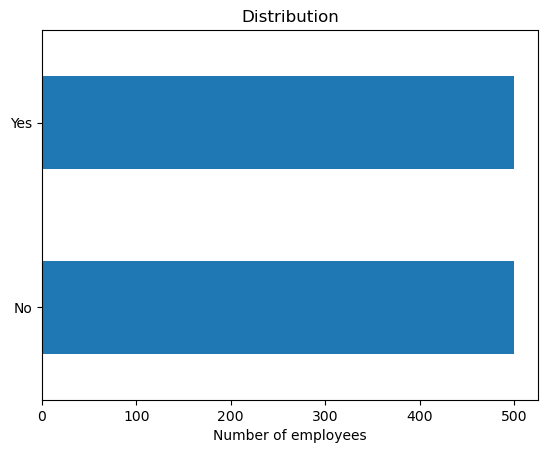

In [2]:
df['left_company'].value_counts().plot.barh()
plt.title('Distribution')
plt.xlabel('Number of employees')
plt.show()

As we can see the data, Both Yes and No are same with each of them having 50% on both sides. It's a Balaced data.

## Question 2
* Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.
* Explain your choices.

In [3]:
numerical_var = ['age', 'commuting_distance', 'education', 'satisfaction_with_environment','seniority_level','satisfaction_with_job','last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_since_last_promotion','years_at_company','years_in_current_job',
       'years_with_current_supervisor']
categorical_var = ['frequency_of_travel', 'department','gender','position','married_or_single']

As its working upon the decisions of employess who left , and the datatype for a catogorial variable needs to be a object. 

## Question 3
* Determine if any numerical variables risk multicolinearity.
* Remove those variables (if any) from your numerical_vars list.
* Why did you or did not remove any?

In [4]:
corr_matrix = df[numerical_var].corr()

In [5]:
corr_matrix

,age,commuting_distance,education,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_since_last_promotion,years_at_company,years_in_current_job,years_with_current_supervisor
age,1.000000,0.012074,0.199138,0.001556,0.522604,0.095242,0.027851,0.003629,0.673804,0.242456,0.384760,0.310010,0.273679
commuting_distance,0.012074,1.000000,0.033003,-0.019556,0.038915,0.023859,0.104421,0.089282,0.025593,0.047552,0.023017,0.031890,0.031520
education,0.199138,0.033003,1.000000,-0.059586,0.080685,0.015148,0.013515,-0.014162,0.160822,0.077218,0.091614,0.073181,0.083453
satisfaction_with_environment,0.001556,-0.019556,-0.059586,1.000000,0.009462,-0.006160,0.014812,0.006943,-0.027203,0.042132,0.001339,0.023698,0.021875
seniority_level,0.522604,0.038915,0.080685,0.009462,1.000000,0.040606,-0.022683,-0.029956,0.779351,0.392935,0.572724,0.478151,0.430047
satisfaction_with_job,0.095242,0.023859,0.015148,-0.006160,0.040606,1.000000,-0.037273,-0.089030,0.029119,0.038015,0.071920,0.037591,0.001472
last_raise_pct,0.027851,0.104421,0.013515,0.014812,-0.022683,-0.037273,1.000000,0.792791,-0.004905,0.000615,0.004435,0.039691,0.060882
last_performance_rating,0.003629,0.089282,-0.014162,0.006943,-0.029956,-0.089030,0.792791,1.000000,0.014877,0.030595,0.022364,0.087038,0.100502
total_years_working,0.673804,0.025593,0.160822,-0.027203,0.779351,0.029119,-0.004905,0.014877,1.000000,0.423619,0.685955,0.548494,0.506007
years_since_last_promotion,0.242456,0.047552,0.077218,0.042132,0.392935,0.038015,0.000615,0.030595,0.423619,1.000000,0.630344,0.611928,0.599529


In [6]:
corr_matrix[corr_matrix[:] > 0.8]

,age,commuting_distance,education,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_since_last_promotion,years_at_company,years_in_current_job,years_with_current_supervisor
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commuting_distance,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction_with_environment,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniority_level,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction_with_job,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_raise_pct,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
last_performance_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
total_years_working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
years_since_last_promotion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [7]:
corr_matrix[corr_matrix[:] < -0.8]

,age,commuting_distance,education,satisfaction_with_environment,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,years_since_last_promotion,years_at_company,years_in_current_job,years_with_current_supervisor
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commuting_distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction_with_environment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniority_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction_with_job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_raise_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_performance_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_years_working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_since_last_promotion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(['years_at_company', 'years_in_current_job'], axis=1)

As we can see the above table and say that , if two numerical variables have a correlation coefficient greater than 0.8 or less than -0.8, then we can consider removing one of them from the numerical_vars list to avoid multicollinearity. we remove years_at_company, years_in_current_job.

In [9]:
frequency_of_travel  = pd.get_dummies(df['frequency_of_travel'],drop_first=True)
department = pd.get_dummies(df['department'],drop_first=True)
gender = pd.get_dummies(df['gender'],drop_first=True)
position = pd.get_dummies(df['position'],drop_first=True)
married_or_single = pd.get_dummies(df['married_or_single'],drop_first=True)

df.drop(['frequency_of_travel','department','gender','position','married_or_single'],axis=1,inplace=True)

In [10]:
df = pd.concat([df,frequency_of_travel,department,gender,position,married_or_single],axis=1)

In [11]:
numerical_var = ['age', 'commuting_distance', 
       'satisfaction_with_environment',
       'satisfaction_with_job',
       'years_with_current_supervisor']
       
catogorial_var = ['last_raise_pct','seniority_level', 'last_performance_rating', 'years_since_last_promotion','education',
       'total_years_working']

ohes = [ 'Travel_Frequently', 'Travel_Rarely',
       'Research & Development', 'Sales', 'Male', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative', 'Married', 'Single']


## Question 4
* Split the data into training and test sets.
* Use 20% of the data for test and a random state of 124.

In [12]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = df['left_company']
    X = df[[x for x in df.columns if x != 'left_company']]

    return train_test_split(X, y, test_size=0.2,random_state = 124)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 800
Test examples: 200


## Question 5
* Create a pipeline to process the numerical data.
* Create a pipeline to process the categorical data.
* Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

poly_pipeline = Pipeline([
        ('add_polynomials', PolynomialFeatures(2, include_bias=False)),
        ('standardize_poly', StandardScaler())])

processing_pipeline = ColumnTransformer(transformers=[
        ('poly_processing', poly_pipeline, numerical_var),
        ('nonpoly_scaling', StandardScaler(), catogorial_var),
        ('dummys', OneHotEncoder(drop='first'), ohes)]
    )

In [14]:
# Fit and transform the training data using the ColumnTransformer
X_train_processed = processing_pipeline.fit_transform(X_train)

# Verify the columns in the numerical pipeline
print('Numerical pipeline output shape:', poly_pipeline.fit_transform(X_train[numerical_var]).shape)

print('Numerical pipeline output shape:', poly_pipeline.fit_transform(X_train[catogorial_var]).shape)

Numerical pipeline output shape: (800, 20)
Numerical pipeline output shape: (800, 27)


## Question 6
* Create a pipeline that combines the pre-processing and implements a logistic regression model.
* Print the accuracy on the training set and the test set.
* Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

def generate_estimates():
    numerical_var = ['age', 'commuting_distance', 
     'satisfaction_with_environment',
      'satisfaction_with_job',
      'years_with_current_supervisor']
       
    catogorial_var = ['last_raise_pct','seniority_level', 'last_performance_rating', 'years_since_last_promotion','education',
       'total_years_working']

    ohes = [ 'Travel_Frequently', 'Travel_Rarely',
       'Research & Development', 'Sales', 'Male', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative', 'Married', 'Single']

    poly_pipeline = Pipeline([
        ('add_polynomials', PolynomialFeatures(2, include_bias=False)),
        ('standardize_poly', StandardScaler())]
    )
    
    processing_pipeline = ColumnTransformer(transformers=[
        ('poly_processing', poly_pipeline, numerical_var),
        ('nonpoly_scaling', StandardScaler(), catogorial_var),
        ('dummys', OneHotEncoder(drop='first'), ohes)])

    modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty=None,solver='lbfgs', max_iter=3000))])

    return modeling_pipeline.fit(X_train, y_train)

m = generate_estimates()
y_hat = m.predict(X_test)
    
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          No       0.73      0.72      0.72        93
         Yes       0.76      0.77      0.76       107

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



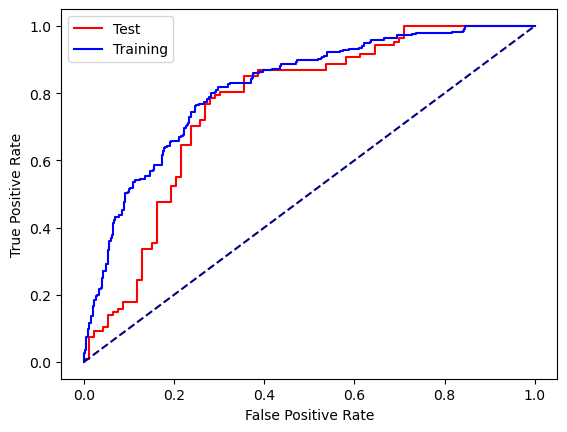

In [17]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='Yes')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))

training:  0.8177254284124513
testing:  0.7670585870766757


## What would you recommend as potential next steps for continuing to develop and evaluate a model?

* We can adjust the regularization strength (C), the penalty (l1 or l2), and the solver (lbfgs, liblinear, or saga).
* We may use domain knowledge to construct interaction terms between existing features or to extract new features from existing ones. 
* We can continuously evaluate the model's performance and make improvements as needed.